# Assignment Overview
* Take the **Wholesale Customers Dataset** from the UCI Machine Learning Datasets repository.
* Contains purchase records from clients of a wholescale distributor, listing **total annual purchases** across many different categories.
* **Follow your own in-class PCA notebook!**

# Steps
1. Read in ```data.csv``` and store it in a dataframe.
1. Store the ```Channel``` column in a separate variable.
1. Drop the ```Channel``` and ```Region``` columns from the OG dataframe.
1. Scale the data and use PCA to engineer new features (Principal Components).
1. Print out the explained variance for each principal component.

In [2]:
import csv
import pandas as pd

# Step 1: Read in data.csv and store it in a dataframe.

In [3]:
og_df = pd.read_csv('data.csv')
og_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Step 2: Store the Channel column in a separate variable.

In [5]:
channel = og_df[['Channel']]
channel.head()

,Channel
0,2
1,2
2,2
3,1
4,2


# Step 3: Drop the Channel and Region columns from the OG dataframe.

In [6]:
og_df = og_df.drop(columns=['Channel', 'Region'])
og_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# Step 4: Scale the data and use PCA to engineer new features (Principal Components).

In [7]:
import numpy as np
import scipy.stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
X = np.array([og_df[i].values for i in og_df.columns])
print(X)

[[12669  7057  6353 ... 14531 10290  2787]
 [ 9656  9810  8808 ... 15488  1981  1698]
 [ 7561  9568  7684 ... 30243  2232  2510]
 [  214  1762  2405 ...   437  1038    65]
 [ 2674  3293  3516 ... 14841   168   477]
 [ 1338  1776  7844 ...  1867  2125    52]]


In [11]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print('Principal components of 6 features:')
print(X_r)

Principal components of 6 features:
[[ 262399.41274802    7583.42689247]
 [ -44925.45561048   48553.39368068]
 [ -52964.3978455   138221.6395971 ]
 [ -21595.86092398 -104241.32490504]
 [ -84226.861087      1082.54906574]
 [ -58686.83728105  -91199.68433095]]


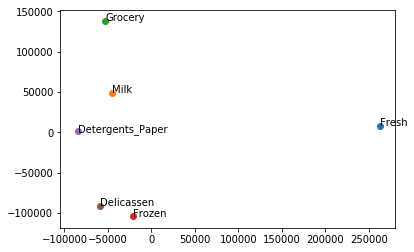

In [14]:
for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(i, j)
    plt.text(i+0.3, j+0.3, og_df.columns[:][k])
plt.show()

# Step 5: Print out the explained variance for each principal component.

In [15]:
# already declared above
# pca = PCA(n_components=2)
# X_r = pca.fit_transform(X)

print('Explained variance:')
print('   ' + str(pca.explained_variance_))
print('Explained variance ratio:')
print('   ' + str(pca.explained_variance_ratio_))
print('Explained variance with cumulative sum:')
print('   ' + str(pca.explained_variance_ratio_.cumsum()))
print('Correlation of PCA Component:')
print('   ' + str(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1])))

Explained variance:
   [1.69363332e+10 8.14099404e+09]
Explained variance ratio:
   [0.60226909 0.28950004]
Explained variance with cumulative sum:
   [0.60226909 0.89176913]
Correlation of PCA Component:
   (6.497430766968239e-17, 1.0)
